In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats


In [6]:
data=pd.read_csv(r"\Users\ARADHYA\Videos\Titanic-Dataset.csv")

In [7]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.shape

(891, 12)

In [10]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Categorical attributes

In [11]:
#Survived
#pclass
#sex
#parch
#embarked

# Numerical attributes 

In [12]:
#Age 
#Fare
#PaasengerID

# Finding mixed columns

In [13]:
#Name
#ticket
#cabin

# Checking null values

In [14]:
data.isnull().sum()   #checking for missing  values

# According to the process we have missing values for some of the attributes like
# Age with 177 missing values
# Cabin with 687 missing values
# Embarked with 2 missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Dropping a cabin column because it has 70% of the missing values in the entire dataset

In [15]:
data.drop(columns=['Cabin'],inplace=True)  # dropping the cabin column 

# There is an error because we had drop cabin column already

# Replace missing age attribute by its mean.

In [16]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

# Checking empty rows of embarked column

In [17]:
data['Embarked'].isnull().sum()  # checking how many missing values in are in Embarked attribute

2

In [18]:
data[data['Embarked'].isnull()]   # checking rows with missing values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [19]:
data['Embarked'].value_counts()   # checking values that have appeared frequently.

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [20]:
data['Embarked'].fillna('S',inplace=True)  #replacing the missing values by most appreared values in attributes

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [22]:
data['Parch'].value_counts()   # we have found out total number of people travelling alone as well as with parents, etc
                               # 0= single travelers  #1=people travelling with 1 parents or one or  more persons and so on


Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [23]:
# Change exisiting datatypes into appropriate datatypes
#Sex (category) #Age (Int) # Embarked (Category) #survived (category) # PClass(category)

In [24]:
data['Sex']=data['Sex'].astype('category')   # changing inappropriate data type into a correct form
data['Age']=data['Age'].astype('int')
data['Embarked']=data['Age'].astype('category')
data['Survived']=data['Survived'].astype('category')
data['Pclass']=data['Pclass'].astype('category')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 51.1+ KB


In [26]:
data.describe()  # checking the five point summary thats include ( median , min , max , upper quartile , and lower quartile)
                 # as we can see that most of the travlers were young 
                 # average fare paid by the passengers are 32 dollars
                

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
# Re-organizing the data to faciliate analysis   

In [28]:
data1=data[['Sex','Age','Survived','Pclass','Parch']]

In [29]:
data1.head()

,Sex,Age,Survived,Pclass,Parch
0,male,22,0,3,0
1,female,38,1,1,0
2,female,26,1,3,0
3,female,35,1,1,0
4,male,35,0,3,0


In [30]:
# now we are going to starts with the visualization part

In [31]:
data1['Survived'].isnull().sum()

0

In [32]:
data1['Survived'].value_counts()  #here 0's are not survived and 1's are survived

Survived
0    549
1    342
Name: count, dtype: int64

In [33]:
data1['Survived'].value_counts(normalize=True) 

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

# Based on the given population information we can say that only 38% of the passengers are survivors

In [34]:
data1['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [35]:
data1['Sex'].value_counts(normalize=True)

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

# Based on the given population information we can say that there are 65% of males and 35% of females

In [36]:
data1['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [37]:
data1['Pclass'].value_counts(normalize=True)

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

# Based on the above information we can say that --- 3rd Class--> 55%  2nd Class --> 20.6%  1st Class --> 24.2%

In [38]:
data1['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [39]:
data1['Parch'].value_counts(normalize=True)

Parch
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: proportion, dtype: float64

# From the above imformation we can say that there were 76% of lone travelers

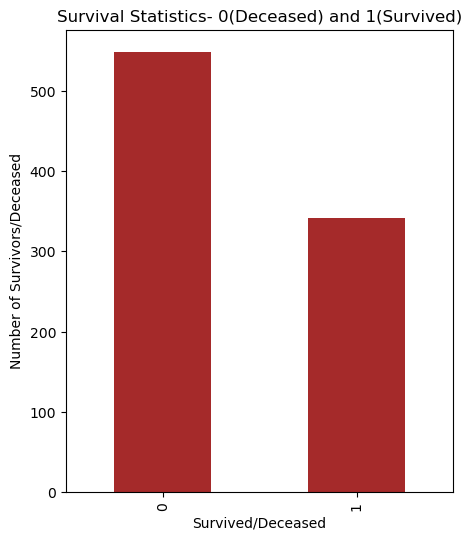

In [53]:
data1['Survived'].value_counts().plot(kind='bar',color='brown',figsize=(5,6))
plt.title('Survival Statistics- 0(Deceased) and 1(Survived)')
plt.xlabel('Survived/Deceased')
plt.ylabel('Number of Survivors/Deceased')
plt.show()


#    EDA (Exploratory Data Analysis) visualization

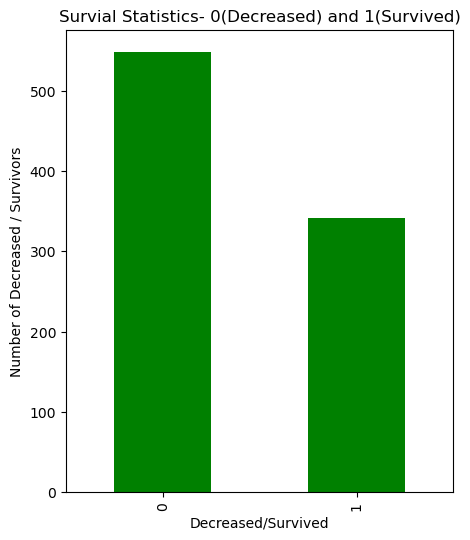

In [41]:
data1['Survived'].value_counts().plot(kind='bar',color='green',figsize=(5,6))
plt.title('Survial Statistics- 0(Decreased) and 1(Survived)')
plt.xlabel('Decreased/Survived')
plt.ylabel('Number of Decreased / Survivors')
plt.show()                                      # 0's are showing number of decreased and 1's are showing numbers of survived 

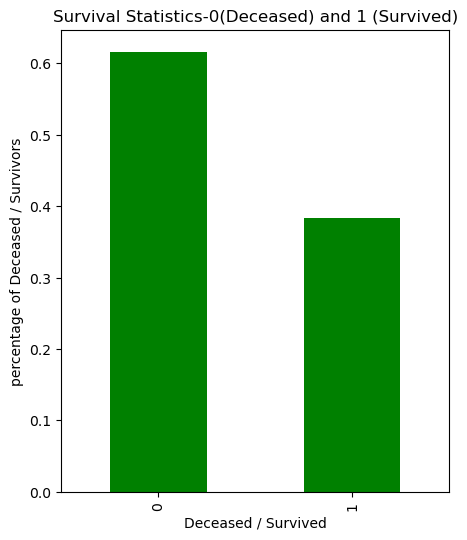

In [42]:
data1['Survived'].value_counts(normalize=True).plot(kind='bar',color='green',figsize=(5,6))
plt.title('Survival Statistics-0(Deceased) and 1 (Survived)')
plt.xlabel('Deceased / Survived')
plt.ylabel('percentage of Deceased / Survivors')
plt.show()                                          # percentage of deceased and survivors 

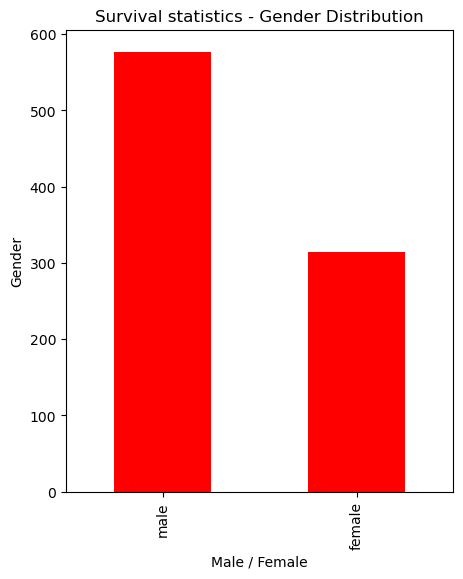

In [43]:
data1['Sex'].value_counts().plot(kind='bar',color='red',figsize=(5,6))
plt.title('Survival statistics - Gender Distribution')
plt.xlabel('Male / Female')
plt.ylabel('Gender')
plt.show()                            

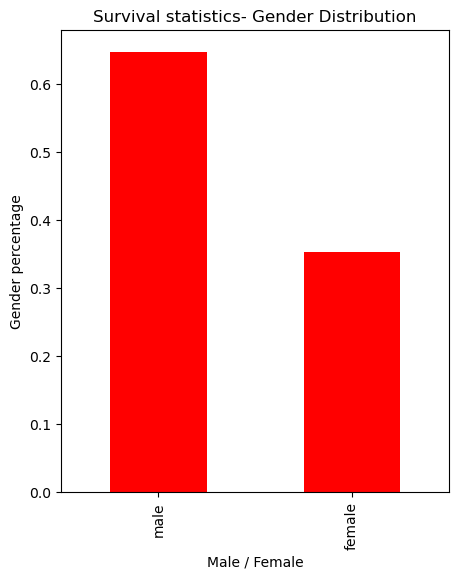

In [44]:
data1['Sex'].value_counts(normalize=True).plot(kind='bar',color='red',figsize=(5,6))
plt.title('Survival statistics- Gender Distribution')
plt.xlabel('Male / Female')
plt.ylabel('Gender percentage')
plt.show()                       # there were 65% of male and 35.24% of female were there 

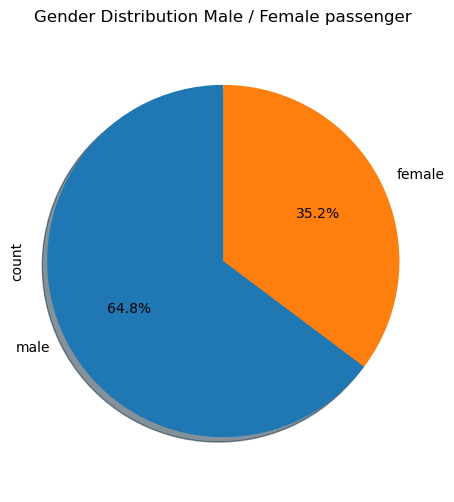

In [45]:
data1['Sex'].value_counts().plot(kind='pie',figsize=(5,6),autopct='%1.1f%%',startangle=90,shadow=True)
plt.title('Gender Distribution Male / Female passenger')
plt.axis('equal')
plt.show()

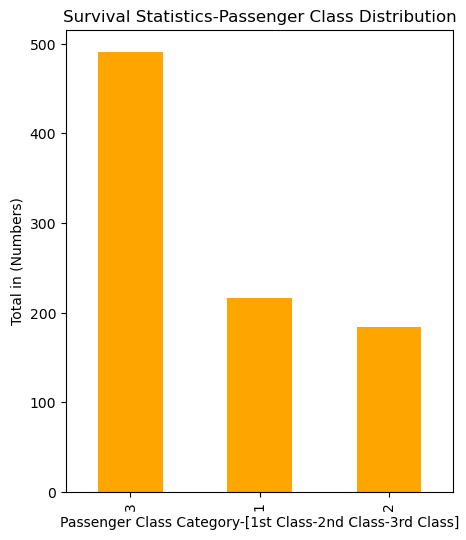

In [46]:
data1['Pclass'].value_counts().plot(kind='bar',color='orange',figsize=(5,6))
plt.title('Survival Statistics-Passenger Class Distribution')
plt.xlabel('Passenger Class Category-[1st Class-2nd Class-3rd Class]')
plt.ylabel('Total in (Numbers)')
plt.show()

# For the crew male members comprised 64.8%, while female members comprised about 35.2%.

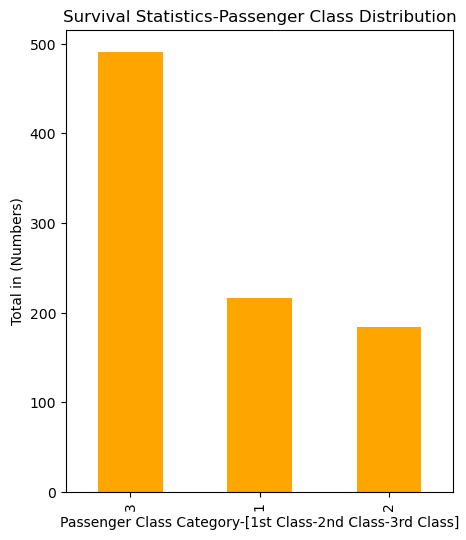

In [47]:
data1['Pclass'].value_counts().plot(kind='bar',color='orange',figsize=(5,6))
plt.title('Survival Statistics-Passenger Class Distribution')
plt.xlabel('Passenger Class Category-[1st Class-2nd Class-3rd Class]')
plt.ylabel('Total in (Numbers)')
plt.show()

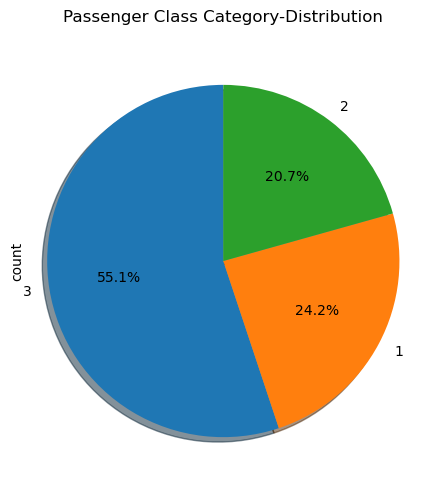

In [48]:
data1['Pclass'].value_counts().plot(kind='pie',figsize=(5,6),autopct='%1.1f%%',startangle=90,shadow=True)
plt.title('Passenger Class Category-Distribution')
plt.axis('equal')
plt.show()

In [49]:
male_survivor_data = data1[(data1['Sex']=='male')&(data1['Survived']==1)]

In [50]:
male_survivor_data

,Sex,Age,Survived,Pclass,Parch
17,male,29,1,2,0
21,male,34,1,2,0
23,male,28,1,1,0
36,male,29,1,3,0
55,male,29,1,1,0
...,...,...,...,...,...
838,male,32,1,3,0
839,male,29,1,1,0
857,male,51,1,1,0
869,male,4,1,3,1


In [51]:
print(len(male_survivor_data))

109


# Hence, based on the available information we can say that there are 109 male survivors

In [52]:
female_survivor_data= data1[(data1['Sex']=='female') & (data1['Survived']==1)]

In [54]:
female_survivor_data

,Sex,Age,Survived,Pclass,Parch
1,female,38,1,1,0
2,female,26,1,3,0
3,female,35,1,1,0
8,female,27,1,3,2
9,female,14,1,2,0
...,...,...,...,...,...
874,female,28,1,2,0
875,female,15,1,3,0
879,female,56,1,1,1
880,female,25,1,2,1


In [55]:
print(len(female_survivor_data))

233


# Hence, based on the available information we can say that there are 233 female survivors

In [56]:
total_survivor_data=(female_survivor_data , male_survivor_data)

In [57]:
total_survivor_data=pd.concat(total_survivor_data)

In [58]:
total_survivor_data

,Sex,Age,Survived,Pclass,Parch
1,female,38,1,1,0
2,female,26,1,3,0
3,female,35,1,1,0
8,female,27,1,3,2
9,female,14,1,2,0
...,...,...,...,...,...
838,male,32,1,3,0
839,male,29,1,1,0
857,male,51,1,1,0
869,male,4,1,3,1


In [59]:
print(len(total_survivor_data))

342


In [60]:
total_survivor_data.isnull().sum()

Sex         0
Age         0
Survived    0
Pclass      0
Parch       0
dtype: int64

In [61]:
total_survivor_data[total_survivor_data['Age'].isnull()]    # we dont have null values in anyone of the columns

,Sex,Age,Survived,Pclass,Parch


In [62]:
total_survivor_data['Sex'].value_counts()

Sex
female    233
male      109
Name: count, dtype: int64

In [63]:
total_survivor_data['Sex'].value_counts(normalize=True)   # from this we can se that total female survivors are 68%
                                                          # and total male survivors are 31.8% 

Sex
female    0.681287
male      0.318713
Name: proportion, dtype: float64

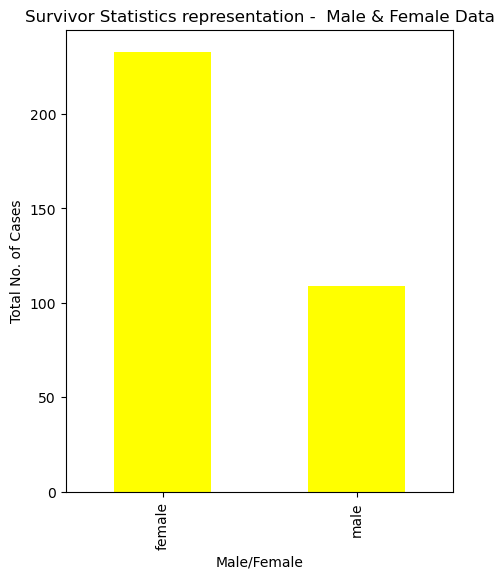

In [64]:
total_survivor_data['Sex'].value_counts().plot(kind='bar',color='yellow',figsize=(5,6))
plt.title('Survivor Statistics representation -  Male & Female Data')
plt.xlabel('Male/Female')
plt.ylabel('Total No. of Cases')
plt.show()

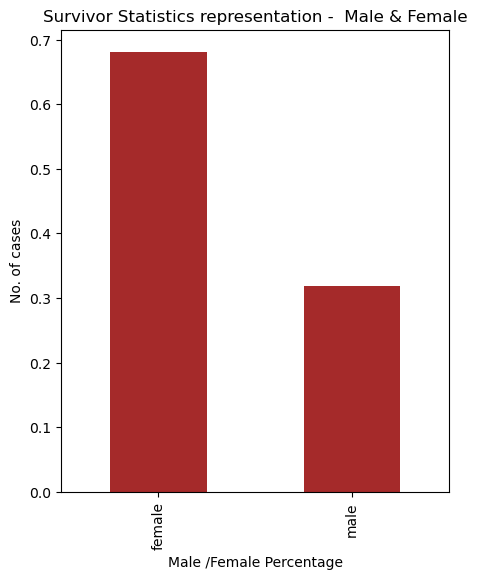

In [65]:
total_survivor_data['Sex'].value_counts(normalize=True).plot(kind='bar',color='brown',figsize=(5,6))
plt.title('Survivor Statistics representation -  Male & Female')
plt.xlabel('Male /Female Percentage')
plt.ylabel('No. of cases')
plt.show()                                         #68% for female  and  31.8% for male

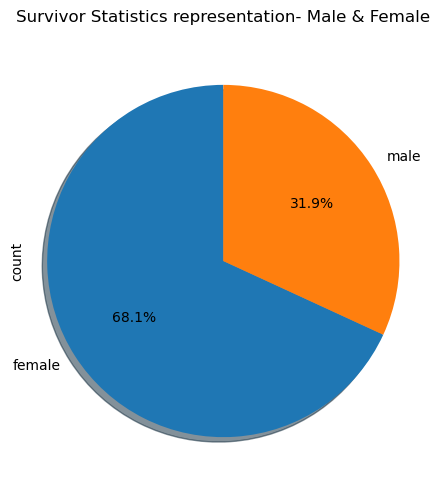

In [66]:
total_survivor_data['Sex'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(5,6),startangle=90,shadow=True)
plt.title('Survivor Statistics representation- Male & Female')
plt.axis('equal')
plt.show()


In [67]:
total_survivor_data['Pclass'].value_counts()     

Pclass
1    136
3    119
2     87
Name: count, dtype: int64

In [68]:
total_survivor_data['Pclass'].value_counts(normalize=True)  # 39% of people survived from class 1 from the total_survivor_data
                                                            # 34.7% of people survived from class 3 from the total_survivor_data
                                                            # 25.4% of people survived from class 2  from the totals_survivor_data

Pclass
1    0.397661
3    0.347953
2    0.254386
Name: proportion, dtype: float64

In [69]:
# The majority of survivors of the crew comprised of 1st class passengers, followed by 3rd class passengers which is thereafter followed by 2nd class passengers
# The distribution statistics is as follows : 1st Class survivors - 39.8%, 2nd Class survivors - 34.8% and 3rd Class Survivors - 25.4% 

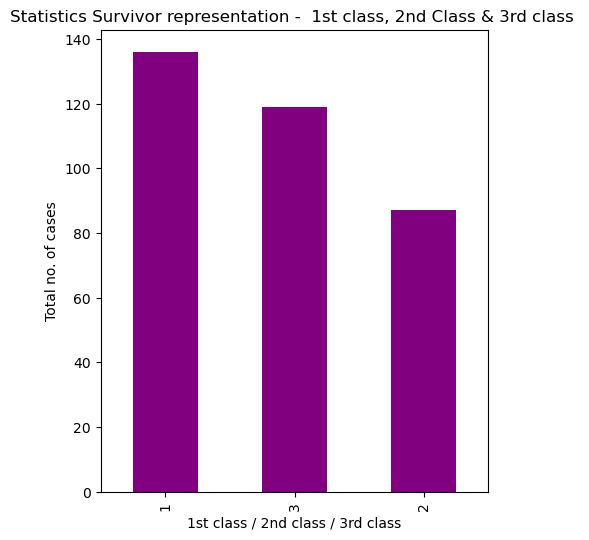

In [70]:
total_survivor_data['Pclass'].value_counts().plot(kind='bar',color='purple',figsize=(5,6))
plt.title('Statistics Survivor representation -  1st class, 2nd Class & 3rd class ')
plt.xlabel('1st class / 2nd class / 3rd class')
plt.ylabel('Total no. of cases')
plt.show()

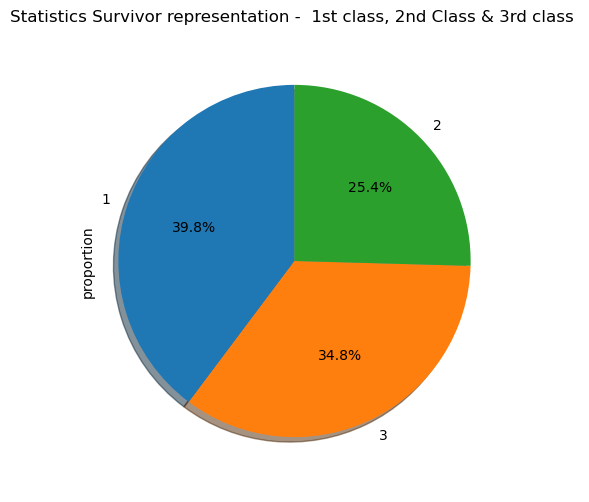

In [71]:
total_survivor_data['Pclass'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',figsize=(5,6),startangle=90,shadow=True)
plt.title('Statistics Survivor representation -  1st class, 2nd Class & 3rd class ')
plt.axis('equal')
plt.show()

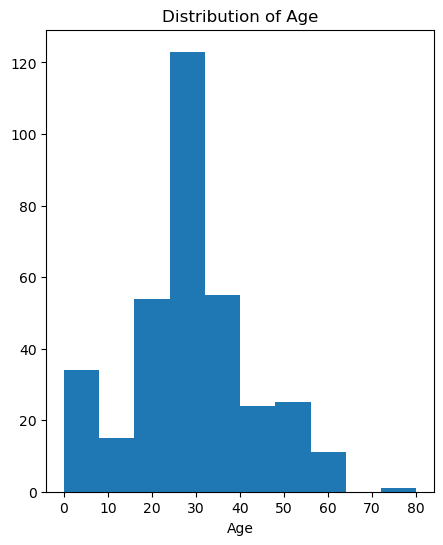

In [72]:
# Histogram to represent the age distribution of population demographics
plt.figure(figsize=(5,6))
plt.hist(total_survivor_data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

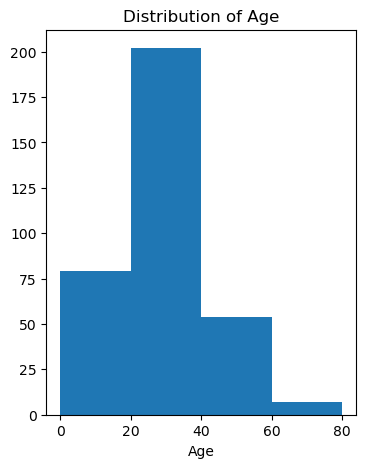

In [73]:
plt.figure(figsize=(4,5))
plt.hist(total_survivor_data['Age'],bins=4)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

# Hence, based on the above analysis it can be ascertained that the majority of survivors from the crew have age less than 40
# Furthermore, the mostly the age of the surviving crew members are between the ages 20-40 years of age

# summary points:-

In [139]:
# For the given dataset 'Titanic_Dataset.csv' we can find that based on the above analysis that mostly passengers were 3rd class onboarders
# The number of male onboarders were more compared to that of female onboarders with males amounting to 65% while females amounting to 35% of onboarders
# Based on the survivor data it can be seen that the females outsurvived males wherein the female survivors amounted to 68% while male survivors accounted to 32%
# Moreover, most of the surivors were from the 1st class crew amounting upto 40% approximately followed by 3rd class accounting upto 34%.
# Furthermore, it can be observed that the majority of survivors from the crew have age less than 40 mostly between 20-40 year